# Saarthak Marathe | ME17B162
# Assignment 9

## 1. SVM (Linearly Seperable Data)

### You are given a two dimensional dataset (SVM_Q1) with 4 classes and you have to use SVM for classification.

### Import the required libraries 

In [37]:
# Imports library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### The code for loading data is given below.

In [38]:
# load data (do not change it)
import numpy as np
x_train, x_test, y_train, y_test = np.load('./SVM_Q1.npy', allow_pickle=True)

In [39]:
x_train, y_train

(array([[-1.36857766,  1.75811615],
        [ 1.47993109,  4.19546942],
        [-1.4735039 ,  6.01227277],
        ...,
        [ 3.4786441 ,  5.63913185],
        [ 4.96997945,  0.35415132],
        [ 4.81984578,  0.54598082]]),
 array([0, 1, 1, ..., 3, 2, 2], dtype=int64))

### 1.a) Write code to visualize the training data

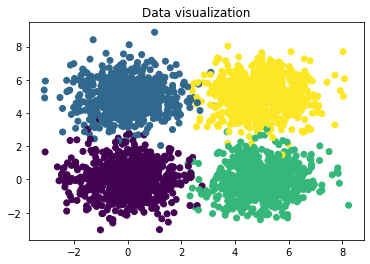

In [40]:
# Generate scatter plot for training data 
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title('Data visualization')
plt.show()

### 1.b) Write the code for SVM classifier (you can write code from scratch or use sklrean)

In [41]:
# SVM classifier code here
clf = SVC(random_state=42)
clf = clf.fit(x_train,y_train)
ypred_test = clf.predict(x_test)

### 1.c) Generate the confusion matrix for the classifer on the test data

In [42]:
# Generate confusion matrix
confusion_matrix(y_test,ypred_test)

array([[327,   4,   5,   0],
       [  3, 324,   0,   1],
       [  3,   0, 336,   1],
       [  0,   1,   1, 314]], dtype=int64)

### 1.d) Visualize the support vectors and decision boundary

Number of support vectors 197


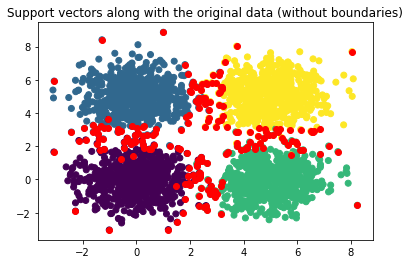

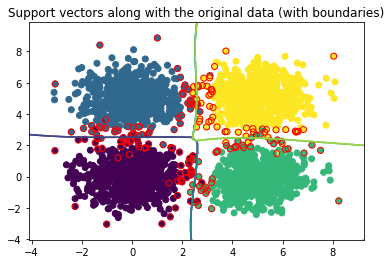

In [43]:
support_vectors = clf.support_vectors_
print('Number of support vectors', len(support_vectors))

# Visualize support vectors (without boundary contours)
plt.scatter(x_train[:,0], x_train[:,1],c = y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support vectors along with the original data (without boundaries)')
plt.show()

# Visualize support vectors (with boundary contours)
x0 = x_train[:, 0]
x1 = x_train[:, 1]
x0_min, x0_max = x0.min()-1, x0.max()+1
x1_min, x1_max = x1.min()-1, x1.max()+1
xx_0, xx_1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), np.arange(x1_min, x1_max, 0.01))
pred = clf.predict(np.c_[xx_0.ravel(), xx_1.ravel()])
pred = pred.reshape(xx_0.shape)
plt.contour(xx_0, xx_1, pred, alpha=0.8)
plt.scatter(x0, x1, c=y_train)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolors='r')
plt.title('Support vectors along with the original data (with boundaries)')
plt.show()

### 1.e) Report the accuracy obtained 

In [44]:
# Code for Accuracy
clf.score(x_test,y_test)

0.9856060606060606

## 2. SVM (Non-linearly separable Data)

### You are given a two dimensional dataset with 2 classes as loaded below and you have to use SVM for classification.

In [45]:
# generating data (do not change it)
from sklearn.datasets import make_circles 
X, Y = make_circles(n_samples = 3000, noise = 0.04) 

### 2.a) Use train_test_split function in sklearn to split the dataset into train and test sets in the ratio of 80:20

In [46]:
# Code here
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

### 2.b) Write the code for SVM classifier with polynomial kernel (you can write code from scratch or use sklrean)

Hint: Use kernel of degree 8.

In [47]:
# SVM code here
clf = SVC(kernel='poly',degree=8)
clf = clf.fit(x_train,y_train)
ypred_test = clf.predict(x_test)

### 2.c) Generate the confusion matrix for the classifer on the test data

In [48]:
# Generate confusion matrix
confusion_matrix(y_test,ypred_test)

array([[279,   4],
       [  2, 315]], dtype=int64)

### 2.d) Visualize the support vectors and plot the decision boundary

Number of support vectors 112


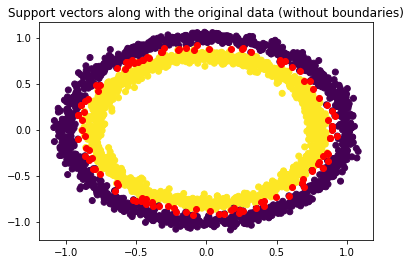

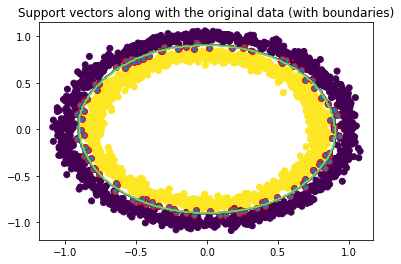

In [49]:
# Visualize support vectors
support_vectors = clf.support_vectors_
print('Number of support vectors', len(support_vectors))

# Visualize support vectors (without boundary contours)
plt.scatter(x_train[:,0], x_train[:,1],c = y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support vectors along with the original data (without boundaries)')
plt.show()

# Visualize support vectors (with boundary contours)
x0 = x_train[:, 0]
x1 = x_train[:, 1]
x0_min, x0_max = x0.min()-0.1, x0.max()+0.1
x1_min, x1_max = x1.min()-0.1, x1.max()+0.1
xx_0, xx_1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), np.arange(x1_min, x1_max, 0.01))
pred = clf.predict(np.c_[xx_0.ravel(), xx_1.ravel()])
pred = pred.reshape(xx_0.shape)
plt.contour(xx_0, xx_1, pred, alpha=0.8)
plt.scatter(x0, x1, c=y_train)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolors='r')
plt.title('Support vectors along with the original data (with boundaries)')
plt.show()

### 2.e) Report the accuracy obtained 

In [50]:
# Accuracy code
clf.score(x_test,y_test)

0.99

### 2.f) Repeat the above steps with sigmoid kernel (you can write code from scratch or use sklearn). You can tune the parameter to obtain better accuracy on test set.

In [55]:
#Code here
clf = SVC(kernel='sigmoid')
clf = clf.fit(x_train,y_train)
ypred_test = clf.predict(x_test)

In [56]:
confusion_matrix(y_test,ypred_test)

array([[146, 137],
       [165, 152]], dtype=int64)

In [57]:
print('Accuracy')
clf.score(x_test,y_test)

Accuracy


0.49666666666666665

Number of support vectors 1225


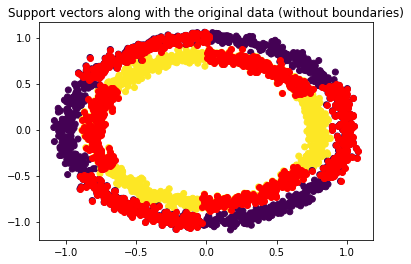

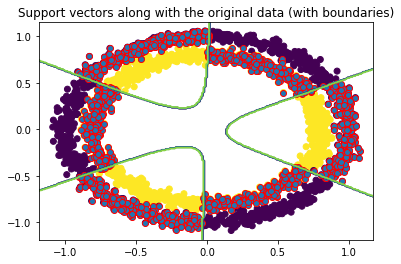

In [58]:
# Visualize support vectors
support_vectors = clf.support_vectors_
print('Number of support vectors', len(support_vectors))

# Visualize support vectors (without boundary contours)
plt.scatter(x_train[:,0], x_train[:,1],c = y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support vectors along with the original data (without boundaries)')
plt.show()

# Visualize support vectors (with boundary contours)
x0 = x_train[:, 0]
x1 = x_train[:, 1]
x0_min, x0_max = x0.min()-0.1, x0.max()+0.1
x1_min, x1_max = x1.min()-0.1, x1.max()+0.1
xx_0, xx_1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), np.arange(x1_min, x1_max, 0.01))
pred = clf.predict(np.c_[xx_0.ravel(), xx_1.ravel()])
pred = pred.reshape(xx_0.shape)
plt.contour(xx_0, xx_1, pred, alpha=0.8)
plt.scatter(x0, x1, c=y_train)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolors='r')
plt.title('Support vectors along with the original data (with boundaries)')
plt.show()

### 2.g) Reapeat the steps 2.c to 2.g with  radial basis function kernel (you can write code from scratch or use sklrean). You can tune the parameter to obtain better accuracy on test set.

In [59]:
#Code here
clf = SVC(kernel='rbf')
clf = clf.fit(x_train,y_train)
ypred_test = clf.predict(x_test)

In [60]:
confusion_matrix(y_test,ypred_test)

array([[280,   3],
       [  2, 315]], dtype=int64)

In [61]:
print('Accuracy')
clf.score(x_test,y_test)

Accuracy


0.9916666666666667

Number of support vectors 438


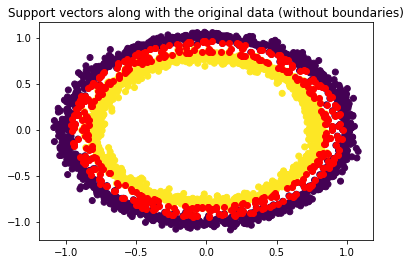

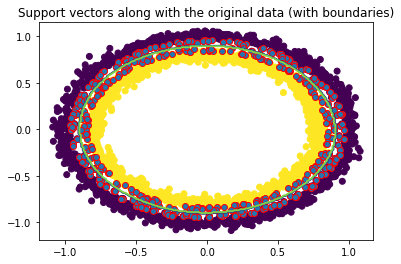

In [62]:
# Visualize support vectors
support_vectors = clf.support_vectors_
print('Number of support vectors', len(support_vectors))

# Visualize support vectors (without boundary contours)
plt.scatter(x_train[:,0], x_train[:,1],c = y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='r')
plt.title('Support vectors along with the original data (without boundaries)')
plt.show()

# Visualize support vectors (with boundary contours)
x0 = x_train[:, 0]
x1 = x_train[:, 1]
x0_min, x0_max = x0.min()-0.1, x0.max()+0.1
x1_min, x1_max = x1.min()-0.1, x1.max()+0.1
xx_0, xx_1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), np.arange(x1_min, x1_max, 0.01))
pred = clf.predict(np.c_[xx_0.ravel(), xx_1.ravel()])
pred = pred.reshape(xx_0.shape)
plt.contour(xx_0, xx_1, pred, alpha=0.8)
plt.scatter(x0, x1, c=y_train)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolors='r')
plt.title('Support vectors along with the original data (with boundaries)')
plt.show()

### 2.h) For which kernal in SVM, you have obtained the highest and lowest  accuracy? What do you think the reason for it? 

For the radial bases function kernel, we observe the highest accuracy and for the sigmoid kernel, we observe the lowest accuracy. 

**Reason**
1. The 'rbf' kernel tries to find a non-linear combination of the given features. Over here, the raial distance from the centre is taken into consideration for the feature relation finding. If we look from a 3-dimensional perspective, it tries to elevate the different data points according to the radial distance and then uses the decision boundaries to separate. 
2. Here we can see that the poly-8 kernel model is also able to fit almost exactly how the 'rbf' kernel did. This shows that its non-linear attributes can fairly emulate the rbf kernel for the given dataset
3. Sigmoid kernel uses highly different decision boundary because of its conditions and shows high inaccuracy
